# Практическая работа №1
# Реализация многослойного персептрона
### Гопиенко Александр Дмитриевич КИ22-17/2Б Вариант 6


In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

classes_of_interest = [1, 7, 8]

def filter_classes(x, y, classes):
  mask = np.isin(y, classes)
  return x[mask], y[mask]

X_train, y_train = filter_classes(X_train_full, y_train_full, classes_of_interest)
X_test, y_test = filter_classes(X_test_full, y_test_full, classes_of_interest)

class_mapping = {cls: i for i, cls in enumerate(classes_of_interest)}

y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
total_size = len(X_train) + len(X_test)

train_size = int(0.6 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

X_combined = np.concatenate((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))

X_train = X_combined[:train_size]
y_train = y_combined[:train_size]
X_val = X_combined[train_size:train_size + val_size]
y_val = y_combined[train_size:train_size + val_size]
X_test = X_combined[train_size + val_size:]
y_test = y_combined[train_size + val_size:]

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_val = X_val.reshape(X_val.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

print(f"Тренировочная выборка: {X_train.shape}, Метки: {y_train.shape}")
print(f"Верификационная выборка: {X_val.shape}, Метки: {y_val.shape}")
print(f"Тестовая выборка: {X_test.shape}, Метки: {y_test.shape}")

Тренировочная выборка: (10080, 784), Метки: (10080,)
Верификационная выборка: (3360, 784), Метки: (3360,)
Тестовая выборка: (3360, 784), Метки: (3360,)


### Создание базовой архитектуры нейронной сети

In [13]:
def create_basic_model():
  model = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(3, activation='softmax')
  ])

  model.compile(
      optimizer=SGD(learning_rate=0.1),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10, restore_best_weights=True)

model = create_basic_model()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9602 - loss: 0.0987 - val_accuracy: 0.9949 - val_loss: 0.0273
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9943 - loss: 0.0216 - val_accuracy: 0.9958 - val_loss: 0.0239
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9952 - loss: 0.0168 - val_accuracy: 0.9958 - val_loss: 0.0227
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9955 - val_loss: 0.0241
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9952 - loss: 0.0120 - val_accuracy: 0.9964 - val_loss: 0.0220
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9966 - loss: 0.0097 - val_accuracy: 0.9949 - val_loss: 0.0248
Epoch 7/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9975 - loss: 0.0096 - val_accuracy: 0.9958 - val_loss: 0.0235
Epoch 8/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accu

### Подбор гиперпараметров

In [16]:
def create_model_1():
  model = Sequential([
      Dense(64, activation='relu', input_shape=(784,)),
      Dense(128, activation='relu'),
      Dense(256, activation='relu'),
      Dense(3, activation='softmax')
  ])

  model.compile(
      optimizer=SGD(learning_rate=0.01),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

def create_model_2():
  model = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      BatchNormalization(),
      Dropout(0.2),
      Dense(128, activation='relu'),
      BatchNormalization(),
      Dropout(0.2),
      Dense(3, activation='softmax')
  ])

  model.compile(
      optimizer=SGD(learning_rate=0.01),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

def create_model_3():
  model = Sequential([
      Dense(128, activation='relu', input_shape=(784,)),
      BatchNormalization(),
      Dropout(0.1),
      Dense(128, activation='relu'),
      BatchNormalization(),
      Dropout(0.1),
      Dense(3, activation='softmax')
  ])

  model.compile(
      optimizer=SGD(learning_rate=0.05),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

In [17]:
model_1 = create_model_1()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
  8/315 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0033 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.9961 - val_loss: 0.0216
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9961 - val_loss: 0.0218
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9978 - loss: 0.0068 - val_accuracy: 0.9964 - val_loss: 0.0221
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9981 - loss: 0.0060 - val_accuracy: 0.9932 - val_loss: 0.0309
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9985 - loss: 0.0060 - val_accuracy: 0.9964 - val_loss: 0.0222
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9986 - loss: 0.0048 - val_accuracy: 0.9955 - val_loss: 0.0231
Epoch 7/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9961 - val_loss: 0.0225
Epoch 8/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.996

In [18]:
model_2 = create_model_2()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
  1/315 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 1.0000 - loss: 0.0074

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9971 - loss: 0.0079 - val_accuracy: 0.9949 - val_loss: 0.0227
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9979 - loss: 0.0066 - val_accuracy: 0.9952 - val_loss: 0.0231
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9986 - loss: 0.0060 - val_accuracy: 0.9961 - val_loss: 0.0227
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.9958 - val_loss: 0.0222
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9985 - loss: 0.0048 - val_accuracy: 0.9943 - val_loss: 0.0255
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9997 - loss: 0.0034 - val_accuracy: 0.9961 - val_loss: 0.0235
Epoch 7/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.9961 - val_loss: 0.0243
Epoch 8/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 0.995

In [19]:
model_3 = create_model_3()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
  1/315 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 1.0000 - loss: 6.5714e-04

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9995 - loss: 0.0037 - val_accuracy: 0.9961 - val_loss: 0.0225
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9958 - val_loss: 0.0234
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9996 - loss: 0.0032 - val_accuracy: 0.9961 - val_loss: 0.0241
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9999 - loss: 0.0033 - val_accuracy: 0.9964 - val_loss: 0.0244
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9998 - loss: 0.0029 - val_accuracy: 0.9961 - val_loss: 0.0240
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.9958 - val_loss: 0.0251
Epoch 7/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9958 - val_loss: 0.0244
Epoch 8/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.996

### Построение графиков

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Basic Model...
Training Model 1...
Training Model 2 (BatchNorm & Dropout)...
Training Model 3 (Reduced Dropout)...


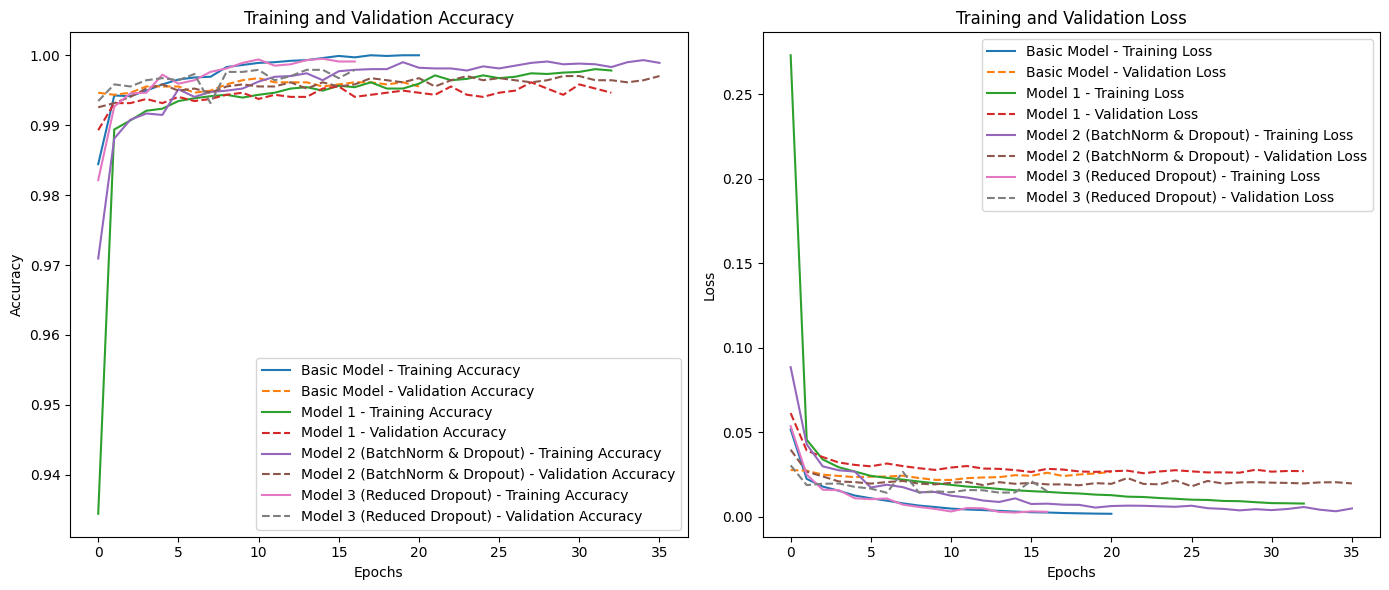

In [21]:
def plot_histories(histories, model_names):
    plt.figure(figsize=(14, 6))

    # График точности
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'{name} - Training Accuracy')
        plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{name} - Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # График функции потерь
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{name} - Training Loss')
        plt.plot(history.history['val_loss'], linestyle='dashed', label=f'{name} - Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

models = [create_basic_model(), create_model_1(), create_model_2(), create_model_3()]
model_names = ['Basic Model', 'Model 1', 'Model 2 (BatchNorm & Dropout)', 'Model 3 (Reduced Dropout)']

histories = []

for model, name in zip(models, model_names):
    print(f"Training {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )
    histories.append(history)

plot_histories(histories, model_names)


### Вывод тестовых результатов

In [22]:
test_scores = []
for model, name in zip(models, model_names):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name}: Test Loss = {loss:.4f}, Test Accuracy = {accuracy:.4f}")
    test_scores.append((name, loss, accuracy))

Basic Model: Test Loss = 0.0196, Test Accuracy = 0.9958
Model 1: Test Loss = 0.0239, Test Accuracy = 0.9946
Model 2 (BatchNorm & Dropout): Test Loss = 0.0204, Test Accuracy = 0.9958
Model 3 (Reduced Dropout): Test Loss = 0.0196, Test Accuracy = 0.9952


# Реализация работы на Pytorch

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader, TensorDataset, random_split

Работа с датасетом на Pytorch

In [31]:
fashion_mnist = datasets.FashionMNIST(root='./data', train=True, download=True)

X_data, y_data = fashion_mnist.data, fashion_mnist.targets
X, y = filter_classes(X_data, y_data, classes_of_interest)

y = torch.tensor([class_mapping[label.item()] for label in y])
X = X.view(X.size(0), -1).float() / 255.0

total_size = len(X)
train_size = int(0.6 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

dataset = TensorDataset(X, y)
train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

print(f"Тренировочная выборка: {len(train_data)}")
print(f"Верификационная выборка: {len(val_data)}")
print(f"Тестовая выборка: {len(test_data)}")

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.0MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 311kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.51MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.51MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Тренировочная выборка: 10800
Верификационная выборка: 3600
Тестовая выборка: 3600


In [32]:
class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 3)
        )

    def forward(self, x):
        return self.model(x)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BaseModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=50):
    for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)


            outputs = model(inputs)
            loss = criterion(outputs, labels)


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)


        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)


                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = correct / total

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


def test_model(model, criterion, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)


            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = correct / total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)
test_model(model, criterion, test_loader)


Epoch 1/10, Loss: 0.0742, Val Loss: 0.0257, Val Accuracy: 0.9931
Epoch 2/10, Loss: 0.0305, Val Loss: 0.0239, Val Accuracy: 0.9933
Epoch 3/10, Loss: 0.0265, Val Loss: 0.0197, Val Accuracy: 0.9928
Epoch 4/10, Loss: 0.0234, Val Loss: 0.0181, Val Accuracy: 0.9931
Epoch 5/10, Loss: 0.0211, Val Loss: 0.0182, Val Accuracy: 0.9933
Epoch 6/10, Loss: 0.0186, Val Loss: 0.0157, Val Accuracy: 0.9947
Epoch 7/10, Loss: 0.0157, Val Loss: 0.0168, Val Accuracy: 0.9939
Epoch 8/10, Loss: 0.0161, Val Loss: 0.0156, Val Accuracy: 0.9950
Epoch 9/10, Loss: 0.0146, Val Loss: 0.0159, Val Accuracy: 0.9944
Epoch 10/10, Loss: 0.0134, Val Loss: 0.0143, Val Accuracy: 0.9944
Test Loss: 0.0144, Test Accuracy: 0.9944


### Модель №1

In [33]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model1().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=50):
    for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)


            outputs = model(inputs)
            loss = criterion(outputs, labels)


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)


        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)


                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = correct / total

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


def test_model(model, criterion, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)


            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = correct / total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)
test_model(model, criterion, test_loader)


Epoch 1/10, Loss: 0.6936, Val Loss: 0.5649, Val Accuracy: 0.9886
Epoch 2/10, Loss: 0.5612, Val Loss: 0.5603, Val Accuracy: 0.9917
Epoch 3/10, Loss: 0.5593, Val Loss: 0.5599, Val Accuracy: 0.9917
Epoch 4/10, Loss: 0.5584, Val Loss: 0.5581, Val Accuracy: 0.9939
Epoch 5/10, Loss: 0.5577, Val Loss: 0.5574, Val Accuracy: 0.9953
Epoch 6/10, Loss: 0.5573, Val Loss: 0.5575, Val Accuracy: 0.9947
Epoch 7/10, Loss: 0.5567, Val Loss: 0.5568, Val Accuracy: 0.9956
Epoch 8/10, Loss: 0.5565, Val Loss: 0.5576, Val Accuracy: 0.9942
Epoch 9/10, Loss: 0.5563, Val Loss: 0.5574, Val Accuracy: 0.9942
Epoch 10/10, Loss: 0.5563, Val Loss: 0.5573, Val Accuracy: 0.9944
Test Loss: 0.5586, Test Accuracy: 0.9928


### Модель №2

In [34]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model2().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=50):
    for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)


            outputs = model(inputs)
            loss = criterion(outputs, labels)


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)


        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)


                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = correct / total

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


def test_model(model, criterion, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)


            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = correct / total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)
test_model(model, criterion, test_loader)


Epoch 1/10, Loss: 0.5724, Val Loss: 0.5727, Val Accuracy: 0.9808
Epoch 2/10, Loss: 0.5598, Val Loss: 0.5572, Val Accuracy: 0.9944
Epoch 3/10, Loss: 0.5583, Val Loss: 0.5575, Val Accuracy: 0.9939
Epoch 4/10, Loss: 0.5578, Val Loss: 0.5567, Val Accuracy: 0.9953
Epoch 5/10, Loss: 0.5573, Val Loss: 0.5573, Val Accuracy: 0.9936
Epoch 6/10, Loss: 0.5567, Val Loss: 0.5563, Val Accuracy: 0.9956
Epoch 7/10, Loss: 0.5566, Val Loss: 0.5573, Val Accuracy: 0.9939
Epoch 8/10, Loss: 0.5568, Val Loss: 0.5564, Val Accuracy: 0.9950
Epoch 9/10, Loss: 0.5560, Val Loss: 0.5570, Val Accuracy: 0.9944
Epoch 10/10, Loss: 0.5561, Val Loss: 0.5559, Val Accuracy: 0.9947
Test Loss: 0.5563, Test Accuracy: 0.9953


### Модель №3

In [35]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model3().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)


def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=50):
    for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = correct / total

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


def test_model(model, criterion, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)


            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = correct / total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)
test_model(model, criterion, test_loader)


Epoch 1/10, Loss: 0.5788, Val Loss: 0.5592, Val Accuracy: 0.9942
Epoch 2/10, Loss: 0.5609, Val Loss: 0.5580, Val Accuracy: 0.9936
Epoch 3/10, Loss: 0.5591, Val Loss: 0.5575, Val Accuracy: 0.9950
Epoch 4/10, Loss: 0.5584, Val Loss: 0.5575, Val Accuracy: 0.9947
Epoch 5/10, Loss: 0.5570, Val Loss: 0.5565, Val Accuracy: 0.9950
Epoch 6/10, Loss: 0.5568, Val Loss: 0.5568, Val Accuracy: 0.9950
Epoch 7/10, Loss: 0.5554, Val Loss: 0.5564, Val Accuracy: 0.9944
Epoch 8/10, Loss: 0.5552, Val Loss: 0.5565, Val Accuracy: 0.9947
Epoch 9/10, Loss: 0.5553, Val Loss: 0.5563, Val Accuracy: 0.9947
Epoch 10/10, Loss: 0.5556, Val Loss: 0.5571, Val Accuracy: 0.9942
Test Loss: 0.5568, Test Accuracy: 0.9950
